In [179]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd 
import numpy as np 
import seaborn as sns 

import os, math

In [183]:
# detect the current working directory
path = os.getcwd()

# list all files in the data directory
def get_files(data_dir):
    path = os.getcwd()
    for root, dirs, files in os.walk(str(path)+'/'+data_dir):
        for filename in files:
            print(filename)
    return root, files

print_files('example_data')

20200731_150759_Gyroscope.csv
20200731_150759_Magnetometer.csv
.DS_Store
20200731_150759_Accelerometer.csv


In [122]:
# files can be indexed from the list
files[1]

'20200731_150759_Magnetometer.csv'

In [141]:
# files can be read from the root directory
# skip first 4 rows 
df = pd.read_csv(root+'/'+files[1], skiprows = [0,1,2,3])
df.head()

Date  HostTimestamp         NodeName  NodeTimestamp  \
0  31/07/2020 15:09:59.284         120300  AM1V310 @395030          17616   
1  31/07/2020 15:09:59.314         120315  AM1V310 @395030          17622   
2  31/07/2020 15:09:59.374         120374  AM1V310 @395030          17628   
3  31/07/2020 15:09:59.435         120435  AM1V310 @395030          17634   
4  31/07/2020 15:09:59.464         120465  AM1V310 @395030          17641   

        RawData  X (mGa)  Y (mGa)  Z (mGa)  
0  62FEA0007CFE     -414      160     -388  
1  53FE9F0077FE     -429      159     -393  
2  5BFEA8007AFE     -421      168     -390  
3  5FFE9F007FFE     -417      159     -385  
4  67FEA20086FE     -409      162     -378

In [94]:
# looking at the first 4 rows
pd.read_csv(root+'/'+files[3], nrows = 4, header=None, skip_blank_lines=False)

0                    1
0  Logged started on  31/07/2020 15:07:59
1            Feature        Accelerometer
2              Nodes      AM1V310 @395030
3                NaN                  NaN

In [203]:
# select by matching strings
# warning: currently expects unique files of the given feature

def find_file(feature):
    filename = ''
    for i in range(0, len(files), 1):
        if (feature in files[i]):
            filename = files[i]
            if (filename != ''):
                print('a file found: %s' %(filename))
    if (filename == ''):
        print('no file found')
    return filename

# execute function
feature = 'Gyro'
find_file(feature)

a file found: 20200801_222758_Gyroscope.csv


'20200801_222758_Gyroscope.csv'

In [202]:
files[2]

'20200801_222758_Gyroscope.csv'

In [164]:
filename

'20200731_150759_Accelerometer.csv'

In [97]:
df = pd.read_csv(root+'/'+filename, skiprows = [0,1,2,3])
df.shape

(344, 8)

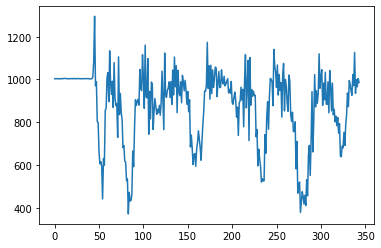

In [13]:
# plot a column
plt.plot(df['Z (mg)'])

Text(0.5, 1.0, 'Accelerometer (mg)')

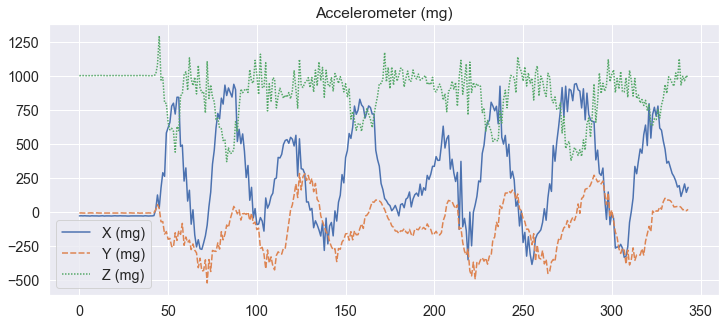

In [24]:
# plot multiple columns x, y, z
sns.set(font_scale=1.3)
plt.figure(figsize=[12,5])
sns.lineplot(data=df.iloc[ :, -3:])
plt.title('Accelerometer (mg)')

In [25]:
df.iloc[ :, -3:].describe()

X (mg)      Y (mg)       Z (mg)
count  344.000000  344.000000   344.000000
mean   257.988372  -98.811047   876.180233
std    340.402660  170.573161   170.728390
min   -385.000000 -521.000000   371.000000
25%    -28.000000 -224.500000   792.000000
50%    200.500000  -86.500000   926.000000
75%    533.750000   10.250000  1003.000000
max    945.000000  284.000000  1296.000000

In [103]:
# find Gyyroscope files
file_name = find_file('Gyroscope')

a file found: 20200731_150759_Gyroscope.csv


In [104]:
file_name

'20200731_150759_Gyroscope.csv'

In [108]:
# expects root and files to be defined
def get_data(filename):
    metadata = pd.read_csv(root+'/'+filename, nrows = 4, header=None, skip_blank_lines=False)
    df = pd.read_csv(root+'/'+filename, skiprows = [0,1,2,3])
    return metadata, df

In [110]:
metadata, df = get_data(file_name)
df.head()

Date  HostTimestamp         NodeName  NodeTimestamp  \
0  31/07/2020 15:09:59.284         120296  AM1V310 @395030          17616   
1  31/07/2020 15:09:59.314         120314  AM1V310 @395030          17622   
2  31/07/2020 15:09:59.374         120374  AM1V310 @395030          17628   
3  31/07/2020 15:09:59.435         120435  AM1V310 @395030          17634   
4  31/07/2020 15:09:59.464         120465  AM1V310 @395030          17641   

        RawData  X (dps)  Y (dps)  Z (dps)  
0  1500F7FF0700      2.1     -0.9      0.7  
1  1500F7FF0700      2.1     -0.9      0.7  
2  1500F7FF0700      2.1     -0.9      0.7  
3  1500F7FF0700      2.1     -0.9      0.7  
4  1500F7FF0800      2.1     -0.9      0.8

In [166]:
file_name = find_file('Magnetometer')
metadata, df = get_data(file_name)
df.head()

a file found: 20200731_150759_Magnetometer.csv


Date  HostTimestamp         NodeName  NodeTimestamp  \
0  31/07/2020 15:09:59.284         120300  AM1V310 @395030          17616   
1  31/07/2020 15:09:59.314         120315  AM1V310 @395030          17622   
2  31/07/2020 15:09:59.374         120374  AM1V310 @395030          17628   
3  31/07/2020 15:09:59.435         120435  AM1V310 @395030          17634   
4  31/07/2020 15:09:59.464         120465  AM1V310 @395030          17641   

        RawData  X (mGa)  Y (mGa)  Z (mGa)  
0  62FEA0007CFE     -414      160     -388  
1  53FE9F0077FE     -429      159     -393  
2  5BFEA8007AFE     -421      168     -390  
3  5FFE9F007FFE     -417      159     -385  
4  67FEA20086FE     -409      162     -378

In [167]:
p = pd.to_datetime(df.Date[0])
p + pd.Timedelta(5, 's')

Timestamp('2020-07-31 15:10:04.284000')

### Slice data by intervals

In [195]:
root, files = get_files('data/normal_runs_start')

20200801_222758_Accelerometer.csv
20200801_222758_Magnetometer.csv
20200801_222758_Gyroscope.csv


In [208]:
file_name = find_file('Accele')

a file found: 20200801_222758_Accelerometer.csv


In [209]:
metadata, df = get_data(file_name)
df.head()

Date  HostTimestamp         NodeName  NodeTimestamp  \
0  01/08/2020 22:35:05.348         426478  AM1V310 @395030          55035   
1  01/08/2020 22:35:05.349         426480  AM1V310 @395030          55041   
2  01/08/2020 22:35:05.520         426643  AM1V310 @395030          55054   
3  01/08/2020 22:35:05.521         426645  AM1V310 @395030          55060   
4  01/08/2020 22:35:05.520         426645  AM1V310 @395030          55047   

        RawData  X (mg)  Y (mg)  Z (mg)  
0  EC049BFF03FF    1260    -101    -253  
1  BE0405FF7BFF    1214    -251    -133  
2  9AFCDF055200    -870    1503      82  
3  C2FFEC0577FB     -62    1516   -1161  
4  7503BAFFBB00     885     -70     187

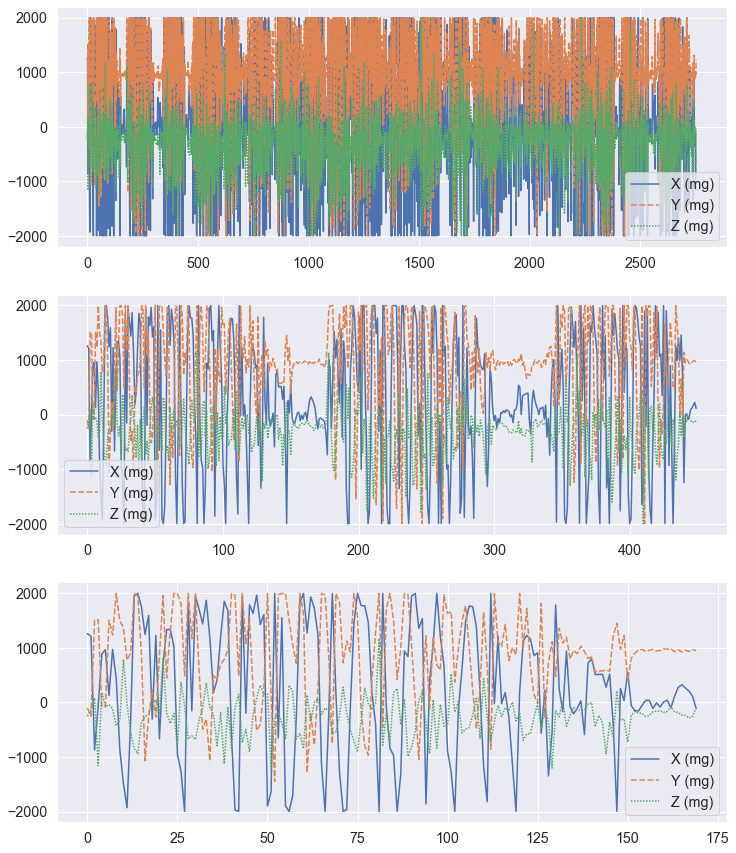

In [219]:
# plot multiple columns x, y, z
sns.set(font_scale=1.3)
plt.figure(figsize=[12,15])
plt.subplot(3,1,1)
sns.lineplot(data=df.iloc[ :, -3:])
plt.subplot(3,1,2)
sns.lineplot(data=df.iloc[ :450, -3:])
plt.subplot(3,1,3)
sns.lineplot(data=df.iloc[ :170, -3:])
plt.show()

In [225]:
df['Date'] = pd.to_datetime(df.Date)
interval = pd.Timedelta(10, 's')

start_time = df.Date[0] # df.Date[:1]
end_time = df.Date[2752] # df.Date[-1:]
session = end_time - start_time 
math.ceil(session/interval)

19

In [223]:
df.tail()

Date  HostTimestamp         NodeName  NodeTimestamp  \
2748 2020-01-08 22:38:17.370         618492  AM1V310 @395030          78997   
2749 2020-01-08 22:38:17.369         618492  AM1V310 @395030          78985   
2750 2020-01-08 22:38:17.391         618513  AM1V310 @395030          79004   
2751 2020-01-08 22:38:17.391         618513  AM1V310 @395030          79010   
2752 2020-01-08 22:38:17.460         618582  AM1V310 @395030          79016   

           RawData  X (mg)  Y (mg)  Z (mg)  
2748  98FEBF03BAFF    -360     959     -70  
2749  B1FF8F039FFF     -79     911     -97  
2750  BFFDE103EBFF    -577     993     -21  
2751  CDFBC303F0FE   -1075     963    -272  
2752  71FBD00451FD   -1167    1232    -687

In [226]:
start_time

Timestamp('2020-01-08 22:35:05.348000')

In [228]:
end_time 

Timestamp('2020-01-08 22:38:17.460000')

In [233]:
df[df.Date <= start_time+interval].describe()

HostTimestamp  NodeTimestamp       X (mg)       Y (mg)       Z (mg)
count     171.000000     171.000000   171.000000   171.000000   171.000000
mean   431019.087719   55602.380117   289.929825   879.432749  -259.380117
std      2957.481319     364.923830  1203.095828   815.732403   375.633961
min    426478.000000   55035.000000 -1998.000000 -1450.000000 -1225.000000
25%    428547.500000   55300.500000  -334.000000   461.000000  -469.500000
50%    430686.000000   55566.000000   222.000000   957.000000  -215.000000
75%    432795.000000   55832.000000  1303.000000  1503.000000   -65.500000
max    436452.000000   56291.000000  1998.000000  1997.000000  1168.000000

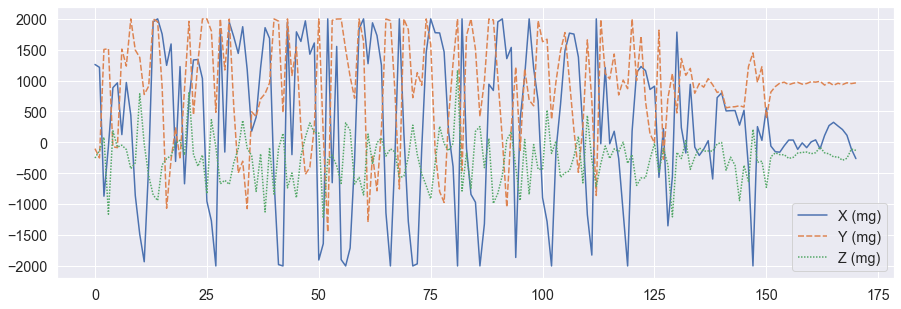

In [237]:
plt.figure(figsize=[15,5])
sns.lineplot(data=df[df.Date <= start_time+interval*1].iloc[ :,-3:])
plt.show()

### Anomaly Data


In [256]:
root, files = get_files('data/anomaly_data')
file_name = find_file('Gyro')

20200801_222758_Accelerometer.csv
20200801_222758_Magnetometer.csv
20200801_222758_Gyroscope.csv
a file found: 20200801_222758_Gyroscope.csv


In [257]:
metadata, df = get_data(file_name)
df.shape

(3573, 8)

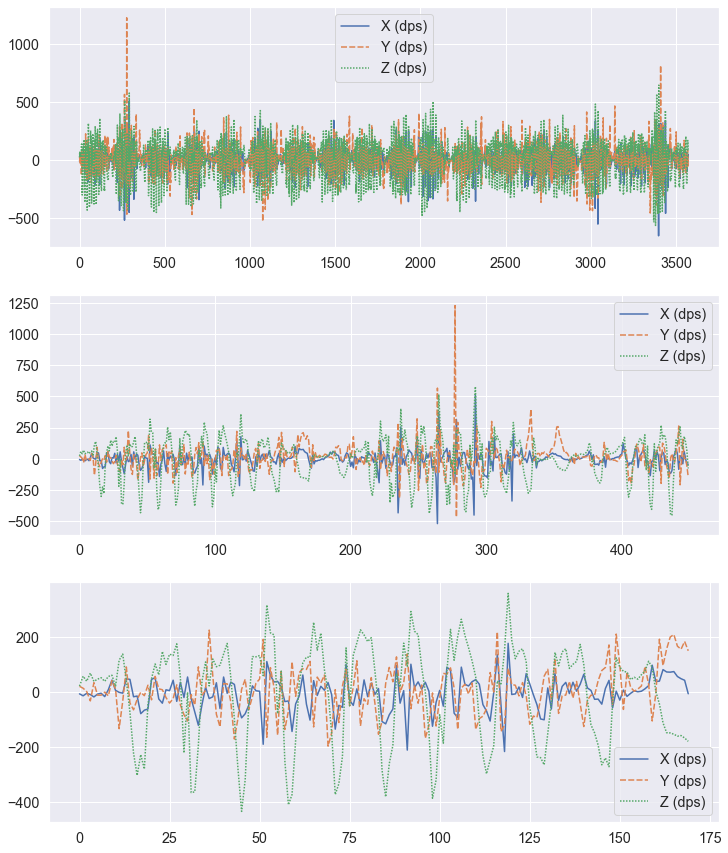

In [258]:
# plot multiple columns x, y, z
sns.set(font_scale=1.3)
plt.figure(figsize=[12,15])
plt.subplot(3,1,1)
sns.lineplot(data=df.iloc[ :, -3:])
plt.subplot(3,1,2)
sns.lineplot(data=df.iloc[ :450, -3:])
plt.subplot(3,1,3)
sns.lineplot(data=df.iloc[ :170, -3:])
plt.show()

In [259]:
df['Date'] = pd.to_datetime(df.Date)
interval = pd.Timedelta(10, 's')

start_time = df.Date[0] # df.Date[:1]
end_time = df.Date[df.shape[0]-1] # df.Date[-1:]
session = end_time - start_time 
math.floor(session/interval)

18

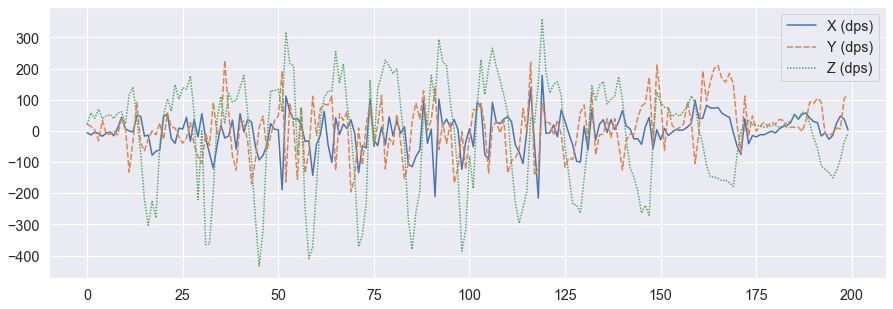

In [260]:
plt.figure(figsize=[15,5])
sns.lineplot(data=df[df.Date <= start_time+interval*1].iloc[ :,-3:])
plt.show()

### Data into a dictionary

In [261]:
files

['20200801_222758_Accelerometer.csv',
 '20200801_222758_Magnetometer.csv',
 '20200801_222758_Gyroscope.csv']

In [477]:
data = {}
root, files = get_files('data/normal_runs_start')

features = ['Accelerometer','Magnetometer','Gyroscope']

def get_dictionary(features): 
    data = {}
    for feature in features:
        file_name = find_file(feature)
        metadata, df = get_data(file_name)
        df['Date'] = pd.to_datetime(df.Date)
        df = df.sort_values(by='Date')
        data[feature] = df
    return data

20200801_222758_Accelerometer.csv
20200801_222758_Magnetometer.csv
20200801_222758_Gyroscope.csv


In [478]:
data = get_dictionary(features)

a file found: 20200801_222758_Accelerometer.csv
a file found: 20200801_222758_Magnetometer.csv
a file found: 20200801_222758_Gyroscope.csv


In [286]:
data[features[0]].head(n=10)

Date  HostTimestamp         NodeName  NodeTimestamp  \
0  2020-01-08 22:35:05.348         426478  AM1V310 @395030          55035   
1  2020-01-08 22:35:05.349         426480  AM1V310 @395030          55041   
2  2020-01-08 22:35:05.520         426643  AM1V310 @395030          55054   
4  2020-01-08 22:35:05.520         426645  AM1V310 @395030          55047   
3  2020-01-08 22:35:05.521         426645  AM1V310 @395030          55060   
5  2020-01-08 22:35:05.551         426674  AM1V310 @395030          55066   
6  2020-01-08 22:35:05.583         426704  AM1V310 @395030          55072   
7  2020-01-08 22:35:05.700         426823  AM1V310 @395030          55079   
8  2020-01-08 22:35:05.790         426912  AM1V310 @395030          55085   
10 2020-01-08 22:35:05.820         426942  AM1V310 @395030          55097   

         RawData  X (mg)  Y (mg)  Z (mg)  
0   EC049BFF03FF    1260    -101    -253  
1   BE0405FF7BFF    1214    -251    -133  
2   9AFCDF055200    -870    1503      82  
4   7503BAFFBB00     885     -70     187  
3   C2FFEC0577FB     -62    1516   -1161  
5   C303ABFFB4FF     963     -85     -76  
6   7E00E505D3FF     126    1509     -45  
7   C903D2048DFF     969    1234    -115  
8   B901CD0757FE     441    1997    -425  
10  31FA5E051203   -1487    1374     786

In [272]:
data[features[1]].head()

Date  HostTimestamp         NodeName  NodeTimestamp  \
0 2020-01-08 22:35:05.349         426481  AM1V310 @395030          55041   
1 2020-01-08 22:35:05.349         426482  AM1V310 @395030          55035   
2 2020-01-08 22:35:05.520         426643  AM1V310 @395030          55047   
3 2020-01-08 22:35:05.520         426644  AM1V310 @395030          55054   
4 2020-01-08 22:35:05.521         426645  AM1V310 @395030          55060   

        RawData  X (mGa)  Y (mGa)  Z (mGa)  
0  4CFE4FFFA701     -436     -177      423  
1  6FFE25FFC201     -401     -219      450  
2  39FE58FF8301     -455     -168      387  
3  30FE61FF8A01     -464     -159      394  
4  31FE5CFF8C01     -463     -164      396

In [283]:
data[features[2]].shape

(2753, 8)

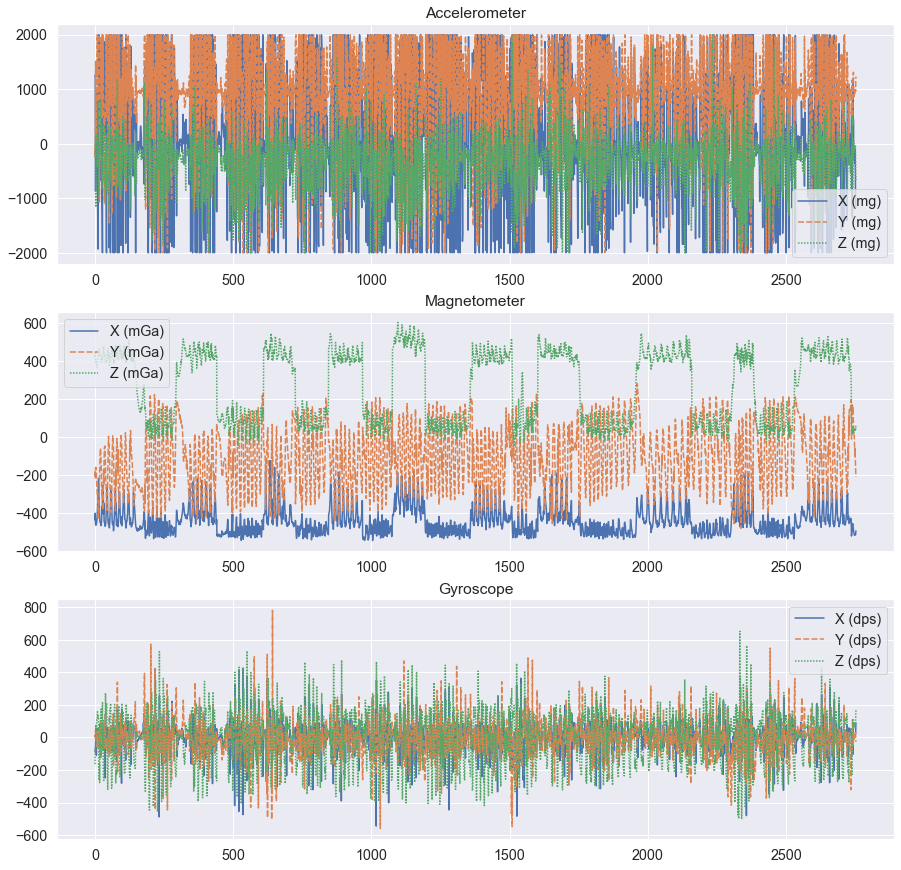

In [336]:
index=None
def plot_features(data, features, index=[]):
    sns.set(font_scale=1.3)
    plt.figure(figsize=[15,15])
    for i in range(0, len(features),1):
        plt.subplot(3,1,i+1)
        if (len(index)>0):
            data_ix = {}
            for f in features:
                data_ix[f] = data[f].iloc[index]
            sns.lineplot(data=data_ix[features[i]].iloc[:, -3:])
            plt.title(features[i])
        else:
            sns.lineplot(data=data[features[i]].iloc[ :, -3:])
            plt.title(features[i])

plot_features(data, features)

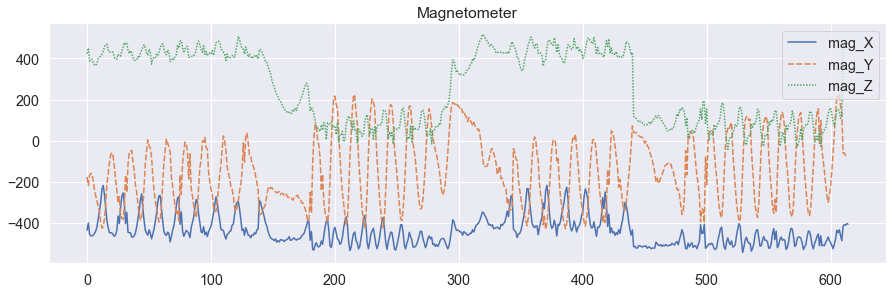

In [364]:
start_time = data[features[0]].Date[0]
interval = pd.Timedelta(40, 's')
df = data[features[0]]
index = df[df.Date < start_time+interval].index

plot_features(data, ['Magnetometer'], index=index)

### Generate Samples

In [339]:
# rename columns

171

In [353]:
np.sum(np.all(list(data[features[0]].Date) == list(data[features[2]].Date)))

0

In [349]:
features

['Accelerometer', 'Magnetometer', 'Gyroscope']

In [351]:
temp = pd.DataFrame()
temp['acc'] = list(data[features[0]].Date)
temp['mag'] = list(data[features[1]].Date)
temp['gyr'] = list(data[features[2]].Date)

In [354]:
temp.head()

acc                     mag                     gyr
0 2020-01-08 22:35:05.348 2020-01-08 22:35:05.349 2020-01-08 22:35:05.348
1 2020-01-08 22:35:05.349 2020-01-08 22:35:05.349 2020-01-08 22:35:05.349
2 2020-01-08 22:35:05.520 2020-01-08 22:35:05.520 2020-01-08 22:35:05.520
3 2020-01-08 22:35:05.520 2020-01-08 22:35:05.520 2020-01-08 22:35:05.520
4 2020-01-08 22:35:05.521 2020-01-08 22:35:05.521 2020-01-08 22:35:05.521

In [358]:
data['Accelerometer'] = data['Accelerometer'].rename(columns={"X (mg)": "acc_X","Y (mg)": "acc_Y","Z (mg)": "acc_Z"})
data['Magnetometer'] = data['Magnetometer'].rename(columns={"X (mGa)": "mag_X","Y (mGa)": "mag_Y","Z (mGa)": "mag_Z"})
data['Gyroscope'] = data['Gyroscope'].rename(columns={"X (dps)": "gyr_X","Y (dps)": "gyr_Y","Z (dps)": "gyr_Z"})

In [359]:
data['Gyroscope'].head()

Date  HostTimestamp         NodeName  NodeTimestamp  \
0 2020-01-08 22:35:05.348         426480  AM1V310 @395030          55035   
1 2020-01-08 22:35:05.349         426482  AM1V310 @395030          55041   
2 2020-01-08 22:35:05.520         426643  AM1V310 @395030          55047   
4 2020-01-08 22:35:05.520         426645  AM1V310 @395030          55054   
3 2020-01-08 22:35:05.521         426644  AM1V310 @395030          55060   

        RawData  gyr_X  gyr_Y  gyr_Z  
0  8EFC9C009DF9  -88.2   15.6 -163.5  
1  18FD060004FD  -74.4    0.6  -76.4  
2  AEFDC90174FC  -59.4   45.7  -90.8  
4  7901FFFE7301   37.7  -25.7   37.1  
3  1C000F00E202    2.8    1.5   73.8

In [361]:
all_data = pd.concat([data['Accelerometer'].Date, 
                      data['Accelerometer'].iloc[:, -3:],
                      data['Magnetometer'].iloc[:, -3:],
                      data['Gyroscope'].iloc[:, -3:]],axis=1)
all_data.head()

Date  acc_X  acc_Y  acc_Z  mag_X  mag_Y  mag_Z  gyr_X  \
0 2020-01-08 22:35:05.348   1260   -101   -253   -436   -177    423  -88.2   
1 2020-01-08 22:35:05.349   1214   -251   -133   -401   -219    450  -74.4   
2 2020-01-08 22:35:05.520   -870   1503     82   -455   -168    387  -59.4   
3 2020-01-08 22:35:05.521    -62   1516  -1161   -464   -159    394    2.8   
4 2020-01-08 22:35:05.520    885    -70    187   -463   -164    396   37.7   

   gyr_Y  gyr_Z  
0   15.6 -163.5  
1    0.6  -76.4  
2   45.7  -90.8  
3    1.5   73.8  
4  -25.7   37.1

In [383]:
all_data = all_data.sort_values(by='Date')
start_time = all_data.Date[0]
interval = pd.Timedelta(10, 's')
end_time = start_time+interval
#df = data[features[0]]
data_samples = {}
i = 0
while start_time < all_data.Date.max():
    data_samples[i] = all_data[(all_data.Date >= start_time)&(all_data.Date < end_time)]
    start_time = end_time
    end_time = end_time+interval
    i+=1

In [387]:
data_samples[1].shape

(173, 10)

In [388]:
len(data_samples)

20

(110, 10)

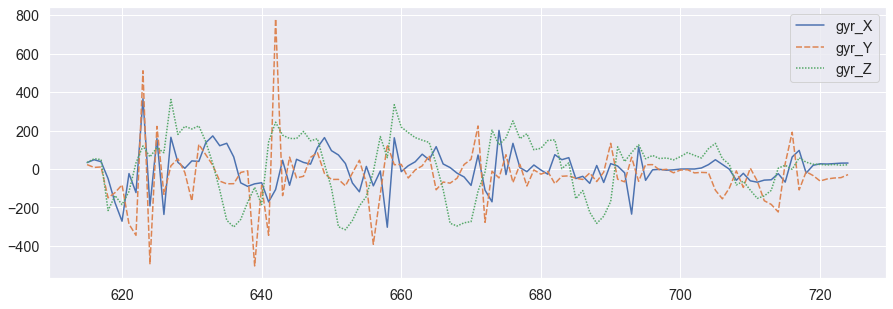

In [395]:
sample = 4
plt.figure(figsize=[15,5])
sns.lineplot(data=data_samples[sample].iloc[:, -3:])
data_samples[sample].shape

In [468]:
resampled_data = {}
for i in range(0, len(data_samples),1):
    resampled_data[i] = data_samples[i].set_index('Date')
    resampled_data[i] = resampled_data[i].resample('50L').mean().interpolate().round(3)

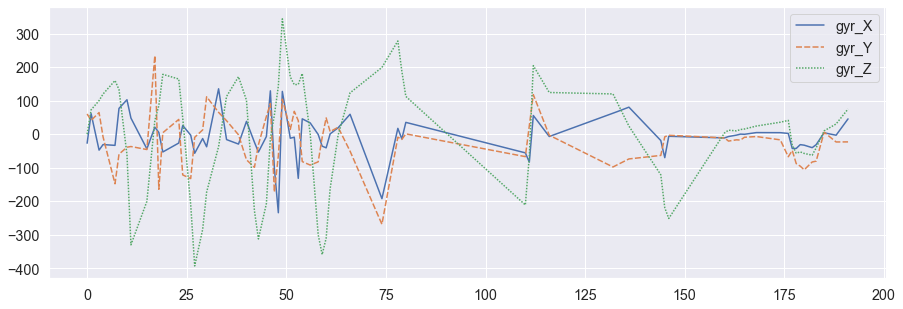

In [476]:
plt.figure(figsize=[15,5])
sns.lineplot(data=resampled_data[2].iloc[:, -3:].reset_index(drop=True))

In [396]:
data = {}
root, files = get_files('data/anomaly_data')

features = ['Accelerometer','Magnetometer','Gyroscope']
for feature in features:
    file_name = find_file(feature)
    metadata, df = get_data(file_name)
    df['Date'] = pd.to_datetime(df.Date)
    df = df.sort_values(by='Date')
    data[feature] = df

20200801_222758_Accelerometer.csv
20200801_222758_Magnetometer.csv
20200801_222758_Gyroscope.csv
a file found: 20200801_222758_Accelerometer.csv
a file found: 20200801_222758_Magnetometer.csv
a file found: 20200801_222758_Gyroscope.csv


In [397]:
data['Accelerometer'] = data['Accelerometer'].rename(columns={"X (mg)": "acc_X","Y (mg)": "acc_Y","Z (mg)": "acc_Z"})
data['Magnetometer'] = data['Magnetometer'].rename(columns={"X (mGa)": "mag_X","Y (mGa)": "mag_Y","Z (mGa)": "mag_Z"})
data['Gyroscope'] = data['Gyroscope'].rename(columns={"X (dps)": "gyr_X","Y (dps)": "gyr_Y","Z (dps)": "gyr_Z"})

In [398]:
all_anomaly = pd.concat([data['Accelerometer'].Date, 
                      data['Accelerometer'].iloc[:, -3:],
                      data['Magnetometer'].iloc[:, -3:],
                      data['Gyroscope'].iloc[:, -3:]],axis=1)
all_anomaly.head()

Date  acc_X  acc_Y  acc_Z  mag_X  mag_Y  mag_Z  gyr_X  \
0 2020-01-08 22:43:45.955    295    764   -264   -406   -206    441   -6.1   
1 2020-01-08 22:43:46.015    455    708   -308   -406   -216    438  -13.1   
2 2020-01-08 22:43:46.136    721    416   -317   -395   -245    435   -4.2   
3 2020-01-08 22:43:46.136    338   1498   -111   -389   -255    432   -8.5   
4 2020-01-08 22:43:46.167   -356    993   -122   -388   -270    426  -17.3   

   gyr_Y  gyr_Z  
0   21.3   22.1  
1   14.4   58.1  
2    2.3   39.9  
3  -31.6   69.3  
4   34.6   39.4

In [404]:
all_anomaly = all_anomaly.sort_values(by='Date')
start_time = all_anomaly.Date[0]
interval = pd.Timedelta(10, 's')
end_time = start_time+interval
#df = data[features[0]]
anomaly_samples = {}
i = 0
while start_time < all_anomaly.Date.max():
    anomaly_samples[i] = all_anomaly[(all_anomaly.Date >= start_time)&(all_anomaly.Date < end_time)]
    start_time = end_time
    end_time = end_time+interval
    i+=1

(200, 10)

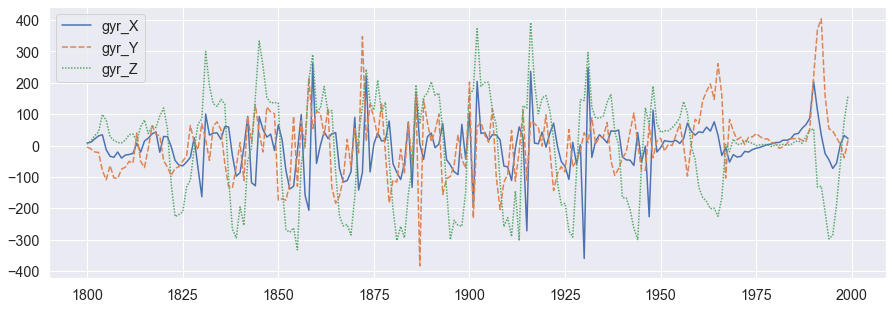

In [440]:
sample = 9
plt.figure(figsize=[15,5])
sns.lineplot(data=anomaly_samples[sample].iloc[:, -3:])
anomaly_samples[sample].shape

In [407]:
len(anomaly_samples)

19

In [444]:
test_df = anomaly_samples[sample].set_index('Date')
test_df.resample('50L').mean().interpolate().round(3)

acc_X     acc_Y     acc_Z    mag_X    mag_Y  \
Date                                                                      
2020-01-08 22:45:15.950  -193.000   954.000  -124.000 -499.000  113.000   
2020-01-08 22:45:16.000  -733.000   880.500   108.000 -504.500   97.500   
2020-01-08 22:45:16.050  -848.000   977.750  -150.500 -508.250   83.750   
2020-01-08 22:45:16.100  -963.000  1075.000  -409.000 -512.000   70.000   
2020-01-08 22:45:16.150   390.000   977.500  -877.000 -527.000   17.500   
2020-01-08 22:45:16.200   532.500   975.750  -807.500 -531.500    3.250   
2020-01-08 22:45:16.250   675.000   974.000  -738.000 -536.000  -11.000   
2020-01-08 22:45:16.300   457.500   808.250  -582.250 -534.500  -15.750   
2020-01-08 22:45:16.350   240.000   642.500  -426.500 -533.000  -20.500   
2020-01-08 22:45:16.400   353.000   792.000    18.000 -533.000  -39.000   
2020-01-08 22:45:16.450   162.000   758.500    18.500 -529.500  -53.500   
2020-01-08 22:45:16.500   288.500   551.250    56.250 -526.250  -66.750   
2020-01-08 22:45:16.550   415.000   344.000    94.000 -523.000  -80.000   
2020-01-08 22:45:16.600  -300.000  1291.000  -546.000 -527.000  -90.000   
2020-01-08 22:45:16.650   251.000   759.000  -296.000 -523.000 -107.000   
2020-01-08 22:45:16.700  1562.000   891.000  -109.000 -502.000 -147.000   
2020-01-08 22:45:16.750   485.000  1997.000   -35.000 -500.000 -174.000   
2020-01-08 22:45:16.800   372.000  1997.000  -660.000 -508.000 -186.000   
2020-01-08 22:45:16.850  -461.500  1741.000  -660.500 -505.000 -198.000   
2020-01-08 22:45:16.900 -1295.000  1485.000  -661.000 -502.000 -210.000   
2020-01-08 22:45:16.950 -1231.500  1151.667  -439.333 -483.833 -249.167   
2020-01-08 22:45:17.000 -1168.000   818.333  -217.667 -465.667 -288.333   
2020-01-08 22:45:17.050  1494.000  1795.500 -1058.500 -471.500 -292.000   
2020-01-08 22:45:17.100  1448.000  1236.750  -816.250 -498.750 -232.500   
2020-01-08 22:45:17.150  1402.000   678.000  -574.000 -526.000 -173.000   
2020-01-08 22:45:17.200   879.000   -52.000  -192.000 -533.000  -71.000   
2020-01-08 22:45:17.250  1149.000  -245.000   229.000 -526.000  -22.000   
2020-01-08 22:45:17.300   493.000   468.000  -210.000 -520.000   32.000   
2020-01-08 22:45:17.350  -806.000  1239.000    66.000 -512.000   50.000   
2020-01-08 22:45:17.400  1411.000  -485.000  -652.000 -511.000   13.000   
...                           ...       ...       ...      ...      ...   
2020-01-08 22:45:24.450   -30.000   907.750  -262.500 -420.250  195.000   
2020-01-08 22:45:24.500  -222.000   950.500  -194.000 -430.500  187.000   
2020-01-08 22:45:24.550  -164.000   917.750  -231.500 -436.750  179.500   
2020-01-08 22:45:24.600  -106.000   885.000  -269.000 -443.000  172.000   
2020-01-08 22:45:24.650    35.500   976.500  -249.000 -442.500  170.000   
2020-01-08 22:45:24.700  -114.000   943.000  -214.000 -439.000  166.000   
2020-01-08 22:45:24.750  -102.500   942.000  -212.750 -443.000  159.500   
2020-01-08 22:45:24.800   -91.000   941.000  -211.500 -447.000  153.000   
2020-01-08 22:45:24.850   -93.000   971.000  -202.000 -443.000  151.000   
2020-01-08 22:45:24.900   -69.250   954.500  -228.000 -442.250  149.000   
2020-01-08 22:45:24.950   -45.500   938.000  -254.000 -441.500  147.000   
2020-01-08 22:45:25.000    -8.000   962.000  -264.000 -440.000  143.000   
2020-01-08 22:45:25.050    15.750   949.500  -257.750 -437.500  149.250   
2020-01-08 22:45:25.100    39.500   937.000  -251.500 -435.000  155.500   
2020-01-08 22:45:25.150    82.000  1002.000   -57.000 -434.000  146.000   
2020-01-08 22:45:25.200  -125.000   881.000  -336.500 -431.000  138.000   
2020-01-08 22:45:25.250  -332.000   760.000  -616.000 -428.000  130.000   
2020-01-08 22:45:25.300  -559.000   938.500   -45.000 -418.500  121.500   
2020-01-08 22:45:25.350  -449.500  1203.250   289.000 -397.500   93.000   
2020-01-08 22:45:25.400  -340.000  1468.000   623.000 -376.500   64.500   
2020-01-08 22:45:25.450  1312.000  1279.000   853.000

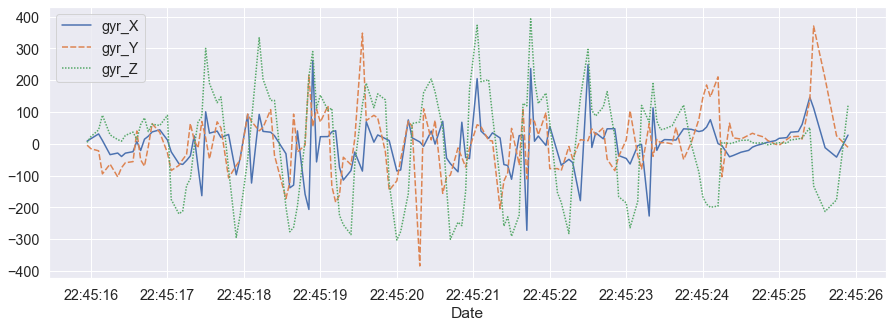

In [453]:
plt.figure(figsize=[15,5])
sns.lineplot(data=test_df.resample('50L').mean().interpolate().iloc[:, -3:])

In [454]:
resampled_anomaly = {}
for i in range(0, len(anomaly_samples),1):
    resampled_anomaly[i] = anomaly_samples[i].set_index('Date')
    resampled_anomaly[i] = resampled_anomaly[i].resample('50L').mean().interpolate().round(3)

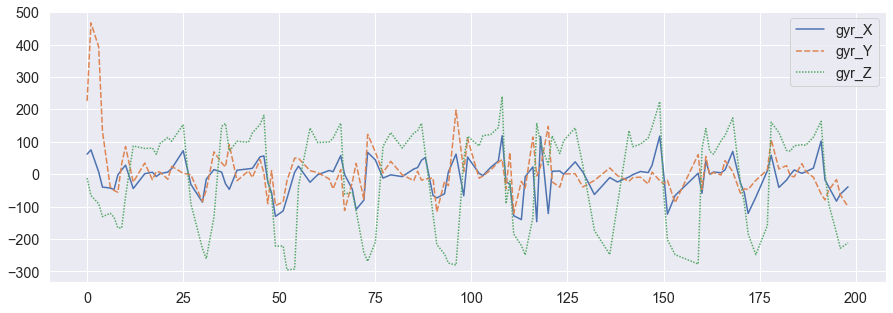

In [467]:
plt.figure(figsize=[15,5])
sns.lineplot(data=resampled_anomaly[16].iloc[:, -3:].reset_index(drop=True))

In [456]:
i

18